# Importing a library that is not in Colaboratory

To import a library that's not in Colaboratory by default, you can use `!pip install` or `!apt-get install`.

In [1]:
!pip install matplotlib-venn

In [2]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


# Install 7zip reader [libarchive](https://pypi.python.org/pypi/libarchive)

In [3]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 124926 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.6.0-1ubuntu1.3_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.6.0-1ubuntu1.3) ...
Setting up libarchive-dev:amd64 (3.6.0-1ubuntu1.3) ...
Processing triggers for man-db (2.10.2-1) ...
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 3.2 MB/s eta 0:00:00
  Created wheel for libarchive: filename=libarchive-0.4.7-py3-none-any.whl size=31631 sha256=fc065942dfffe407d8b7aa91ac634d7a1262de3ab7820b63c1501711ba1bc2fa
  Stored in directory: /root/.cache/pip/wheels/32/98/bd/4893d6923dd027f455b250367d402bfd69a6f4416581df46db
Successfully built libarchive


# Install GraphViz & [PyDot](https://pypi.python.org/pypi/pydot)

In [4]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

# Install [cartopy](http://scitools.org.uk/cartopy/docs/latest/)

In [5]:
!pip install cartopy
import cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 89.2 MB/s eta 0:00:00


In [6]:
import torch
import clip
from PIL import Image
import torchvision.transforms as T
import torch.optim as optim
import matplotlib.pyplot as plt

# Skontrolujeme, či máme GPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Načítame CLIP model
model, preprocess = clip.load("ViT-B/32", device=device)

# Tokenizujeme textový prompt
text_prompt = ["A futuristic cyberpunk city"]
text = clip.tokenize(text_prompt).to(device)
text_features = model.encode_text(text)

# Inicializujeme náhodný obrázok (random noise)
input_image = torch.randn((1, 3, 224, 224), requires_grad=True, device=device)

# Definujeme optimalizátor
optimizer = optim.Adam([input_image], lr=0.1)

# Počet optimalizačných krokov
num_steps = 100

# Transformácie pre normalizáciu
normalize = T.Normalize(mean=[0.481, 0.457, 0.408], std=[0.268, 0.261, 0.275])

print("Starting DAS optimization...")

# DAS optimalizácia
for step in range(num_steps):
    optimizer.zero_grad()
    processed_image = normalize(input_image)
    image_features = model.encode_image(processed_image)

    # Vypočítame stratu ako kosínusovú vzdialenosť
    loss = -torch.cosine_similarity(image_features, text_features).mean()
    loss.backward()
    optimizer.step()

    if step % 10 == 0:
        print(f"Step {step}, Loss: {loss.item()}")

print("Optimization complete. Saving image...")

# Uloženie obrázka ako výstup
output_image = input_image.detach().cpu().squeeze(0).permute(1, 2, 0).numpy()
output_image = (output_image - output_image.min()) / (output_image.max() - output_image.min())  # Normalizácia na 0-1

# Konverzia na PIL Image
output_pil = Image.fromarray((output_image * 255).astype("uint8"))

# Uloženie obrázka
output_pil.save("das_generated_image.png")

# Zobrazenie výsledku
plt.imshow(output_pil)
plt.axis("off")
plt.show()

print("Saved as das_generated_image.png")

ModuleNotFoundError: No module named 'clip'

In [7]:
!pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-zldcyc_0
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-zldcyc_0
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
Could not fetch URL https://pypi.org/simple/nvidia-cuda-nvrtc-cu12/: There was a problem confirming the ssl certificate: [SSL: DECRYPTION_FAILED_OR_BAD_RECORD_MAC] decryption failed or bad record mac (_ssl.c:2580) - skipping
INFO: pip is looking at multiple versions of torch to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of torch to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.py

In [1]:
import clip

In [2]:
import torch
import clip
from PIL import Image
import torchvision.transforms as T
import torch.optim as optim
import matplotlib.pyplot as plt

# Skontrolujeme, či máme GPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Načítame CLIP model
model, preprocess = clip.load("ViT-B/32", device=device)

# Tokenizujeme textový prompt
text_prompt = ["A futuristic cyberpunk city"]
text = clip.tokenize(text_prompt).to(device)
text_features = model.encode_text(text)

# Inicializujeme náhodný obrázok (random noise)
input_image = torch.randn((1, 3, 224, 224), requires_grad=True, device=device)

# Definujeme optimalizátor
optimizer = optim.Adam([input_image], lr=0.1)

# Počet optimalizačných krokov
num_steps = 100

# Transformácie pre normalizáciu
normalize = T.Normalize(mean=[0.481, 0.457, 0.408], std=[0.268, 0.261, 0.275])

print("Starting DAS optimization...")

# DAS optimalizácia
for step in range(num_steps):
    optimizer.zero_grad()
    processed_image = normalize(input_image)
    image_features = model.encode_image(processed_image)

    # Vypočítame stratu ako kosínusovú vzdialenosť
    loss = -torch.cosine_similarity(image_features, text_features).mean()
    loss.backward()
    optimizer.step()

    if step % 10 == 0:
        print(f"Step {step}, Loss: {loss.item()}")

print("Optimization complete. Saving image...")

# Uloženie obrázka ako výstup
output_image = input_image.detach().cpu().squeeze(0).permute(1, 2, 0).numpy()
output_image = (output_image - output_image.min()) / (output_image.max() - output_image.min())  # Normalizácia na 0-1

# Konverzia na PIL Image
output_pil = Image.fromarray((output_image * 255).astype("uint8"))

# Uloženie obrázka
output_pil.save("das_generated_image.png")

# Zobrazenie výsledku
plt.imshow(output_pil)
plt.axis("off")
plt.show()

print("Saved as das_generated_image.png")

Using device: cpu


100%|███████████████████████████████████████| 338M/338M [00:04<00:00, 74.7MiB/s]


Starting DAS optimization...
Step 0, Loss: -0.20023803412914276


RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-7qd45kza
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-7qd45kza
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 31.7 MB/s eta 0:00:00
  Attempting uninstall: torchaudio
    Found exis

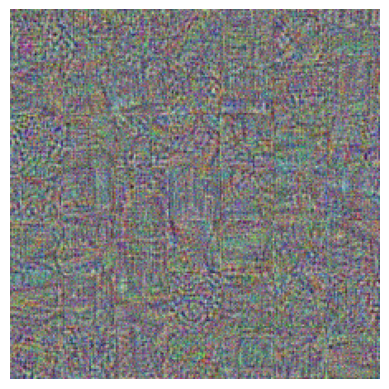

Saved as das_generated_image.png


In [3]:
import torch
import clip
from PIL import Image
import torchvision.transforms as T
import torch.optim as optim
import matplotlib.pyplot as plt

# Inštalácia chýbajúcej knižnice
!pip install git+https://github.com/openai/CLIP.git
!pip install torch torchvision torchaudio numpy pillow tqdm matplotlib

# Skontrolujeme, či máme GPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Načítame CLIP model
model, preprocess = clip.load("ViT-B/32", device=device)

# Tokenizujeme textový prompt
text_prompt = ["A futuristic cyberpunk city"]
text = clip.tokenize(text_prompt).to(device)
text_features = model.encode_text(text)

# Inicializujeme náhodný obrázok (random noise)
input_image = torch.randn((1, 3, 224, 224), requires_grad=True, device=device)

# Definujeme optimalizátor
optimizer = optim.Adam([input_image], lr=0.1)

# Počet optimalizačných krokov
num_steps = 100

# Transformácie pre normalizáciu
normalize = T.Normalize(mean=[0.481, 0.457, 0.408], std=[0.268, 0.261, 0.275])

print("Starting DAS optimization...")

# DAS optimalizácia
for step in range(num_steps):
    optimizer.zero_grad()
    processed_image = normalize(input_image)
    image_features = model.encode_image(processed_image)

    # Vypočítame stratu ako kosínusovú vzdialenosť
    loss = -torch.cosine_similarity(image_features, text_features).mean()
    loss.backward(retain_graph=True)  # Opravené retain_graph=True
    optimizer.step()

    if step % 10 == 0:
        print(f"Step {step}, Loss: {loss.item()}")

print("Optimization complete. Saving image...")

# Uloženie obrázka ako výstup
output_image = input_image.detach().cpu().squeeze(0).permute(1, 2, 0).numpy()
output_image = (output_image - output_image.min()) / (output_image.max() - output_image.min())  # Normalizácia na 0-1

# Konverzia na PIL Image
output_pil = Image.fromarray((output_image * 255).astype("uint8"))

# Uloženie obrázka
output_pil.save("das_generated_image.png")

# Zobrazenie výsledku
plt.imshow(output_pil)
plt.axis("off")
plt.show()

print("Saved as das_generated_image.png")

In [1]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Použité zariadenie: {device}")

Použité zariadenie: cuda


In [2]:
import torch
import clip
from PIL import Image
import torchvision.transforms as T
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Inštalácia CLIP, ak chýba
!pip install git+https://github.com/openai/CLIP.git --quiet
!pip install torch torchvision torchaudio numpy pillow tqdm matplotlib --quiet

# Skontroluj GPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Použité zariadenie: {device}")

# Načítanie CLIP modelu
model, preprocess = clip.load("ViT-B/32", device=device)

# Tokenizácia textového promptu
text_prompt = ["A highly detailed industrial monogram"]
text = clip.tokenize(text_prompt).to(device)
text_features = model.encode_text(text)

# Inicializácia vstupného obrázka s random šumom
input_image = torch.randn((1, 3, 224, 224), requires_grad=True, device=device)

# Optimalizátor s menším learning rate
optimizer = optim.Adam([input_image], lr=0.05)

# Počet krokov optimalizácie (zvýšené na 1000)
num_steps = 1000

# Normalizácia vstupu pre CLIP
normalize = T.Normalize(mean=[0.481, 0.457, 0.408], std=[0.268, 0.261, 0.275])

print("🖌️ Spúšťam DAS optimalizáciu...")

# DAS optimalizácia
for step in range(num_steps):
    optimizer.zero_grad()

    # Aplikujeme normalizáciu na obrázok
    processed_image = normalize(input_image)

    # Získame embedding obrázka z CLIP modelu
    image_features = model.encode_image(processed_image)

    # Vypočítame loss (kosínusová vzdialenosť)
    loss = -torch.cosine_similarity(image_features, text_features).mean()

    # Backpropagation s retain_graph=False
    loss.backward()
    optimizer.step()

    # Každých 50 krokov vypíšeme progres
    if step % 50 == 0:
        print(f"🔹 Krok {step}, Loss: {loss.item()}")

print("✅ Optimalizácia hotová. Ukladám obrázok...")

# Normalizácia výstupného obrázka
output_image = input_image.detach().cpu().squeeze(0).permute(1, 2, 0).numpy()
output_image = (output_image - output_image.min()) / (output_image.max() - output_image.min())

# Konverzia na PIL Image
output_pil = Image.fromarray((output_image * 255).astype("uint8"))

# Uloženie obrázka
output_pil.save("das_generated_image.png")

# Zobrazenie výsledku
plt.imshow(output_pil)
plt.axis("off")
plt.show()

print("✅ Výsledok uložený ako das_generated_image.png")

ModuleNotFoundError: No module named 'clip'

In [3]:
!pip install git+https://github.com/openai/CLIP.git --quiet

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 91.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 53.5 MB/s eta 0:00:00


In [ ]:
import os
os._exit(0)

In [1]:
!pip install git+https://github.com/openai/CLIP.git --quiet

  Preparing metadata (setup.py) ... done


In [2]:
import torch
import clip
from PIL import Image
import torchvision.transforms as T
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Inštalácia CLIP, ak chýba
!pip install git+https://github.com/openai/CLIP.git --quiet
!pip install torch torchvision torchaudio numpy pillow tqdm matplotlib --quiet

# Skontroluj GPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Použité zariadenie: {device}")

# Načítanie CLIP modelu
model, preprocess = clip.load("ViT-B/32", device=device)

# Tokenizácia textového promptu
text_prompt = ["A highly detailed industrial monogram"]
text = clip.tokenize(text_prompt).to(device)
text_features = model.encode_text(text)

# Inicializácia vstupného obrázka s random šumom
input_image = torch.randn((1, 3, 224, 224), requires_grad=True, device=device)

# Optimalizátor s menším learning rate
optimizer = optim.Adam([input_image], lr=0.05)

# Počet krokov optimalizácie (zvýšené na 1000)
num_steps = 1000

# Normalizácia vstupu pre CLIP
normalize = T.Normalize(mean=[0.481, 0.457, 0.408], std=[0.268, 0.261, 0.275])

print("🖌️ Spúšťam DAS optimalizáciu...")

# DAS optimalizácia
for step in range(num_steps):
    optimizer.zero_grad()

    # Aplikujeme normalizáciu na obrázok
    processed_image = normalize(input_image)

    # Získame embedding obrázka z CLIP modelu
    image_features = model.encode_image(processed_image)

    # Vypočítame loss (kosínusová vzdialenosť)
    loss = -torch.cosine_similarity(image_features, text_features).mean()

    # Backpropagation s retain_graph=False
    loss.backward()
    optimizer.step()

    # Každých 50 krokov vypíšeme progres
    if step % 50 == 0:
        print(f"🔹 Krok {step}, Loss: {loss.item()}")

print("✅ Optimalizácia hotová. Ukladám obrázok...")

# Normalizácia výstupného obrázka
output_image = input_image.detach().cpu().squeeze(0).permute(1, 2, 0).numpy()
output_image = (output_image - output_image.min()) / (output_image.max() - output_image.min())

# Konverzia na PIL Image
output_pil = Image.fromarray((output_image * 255).astype("uint8"))

# Uloženie obrázka
output_pil.save("das_generated_image.png")

# Zobrazenie výsledku
plt.imshow(output_pil)
plt.axis("off")
plt.show()

print("✅ Výsledok uložený ako das_generated_image.png")

  Preparing metadata (setup.py) ... done
Použité zariadenie: cuda


100%|███████████████████████████████████████| 338M/338M [00:04<00:00, 79.4MiB/s]


🖌️ Spúšťam DAS optimalizáciu...
🔹 Krok 0, Loss: -0.214599609375


RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

  Preparing metadata (setup.py) ... done
Použité zariadenie: cuda
🖌️ Spúšťam DAS optimalizáciu...
🔹 Krok 0, Loss: -0.2176513671875
🔹 Krok 50, Loss: -0.7822265625
🔹 Krok 100, Loss: -0.8564453125
🔹 Krok 150, Loss: -0.87890625
🔹 Krok 200, Loss: -0.9208984375
🔹 Krok 250, Loss: -0.9423828125
🔹 Krok 300, Loss: -0.95751953125
🔹 Krok 350, Loss: -0.97216796875
🔹 Krok 400, Loss: -0.9755859375
🔹 Krok 450, Loss: -0.9853515625
🔹 Krok 500, Loss: -0.98681640625
🔹 Krok 550, Loss: -0.9912109375
🔹 Krok 600, Loss: -0.9892578125
🔹 Krok 650, Loss: -0.99072265625
🔹 Krok 700, Loss: -0.99365234375
🔹 Krok 750, Loss: -0.994140625
🔹 Krok 800, Loss: -0.9931640625
🔹 Krok 850, Loss: -0.9931640625
🔹 Krok 900, Loss: -0.99560546875
🔹 Krok 950, Loss: -0.99267578125
✅ Optimalizácia hotová. Ukladám obrázok...


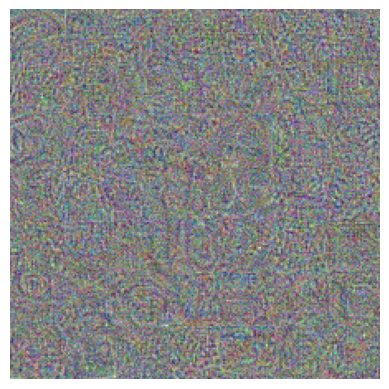

✅ Výsledok uložený ako das_generated_image.png


In [3]:
import torch
import clip
from PIL import Image
import torchvision.transforms as T
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Inštalácia CLIP, ak chýba
!pip install git+https://github.com/openai/CLIP.git --quiet
!pip install torch torchvision torchaudio numpy pillow tqdm matplotlib --quiet

# Skontroluj GPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Použité zariadenie: {device}")

# Načítanie CLIP modelu
model, preprocess = clip.load("ViT-B/32", device=device)

# Tokenizácia textového promptu
text_prompt = ["A highly detailed industrial monogram"]
text = clip.tokenize(text_prompt).to(device)
text_features = model.encode_text(text)

# Inicializácia obrázka s náhodným šumom
input_image = torch.randn((1, 3, 224, 224), requires_grad=True, device=device)

# Normalizácia pre CLIP
normalize = T.Normalize(mean=[0.481, 0.457, 0.408], std=[0.268, 0.261, 0.275])

# Optimalizátor s menším learning rate
optimizer = optim.Adam([input_image], lr=0.05)

# Počet krokov optimalizácie (zvýšené na 1000)
num_steps = 1000

print("🖌️ Spúšťam DAS optimalizáciu...")

# DAS optimalizácia
for step in range(num_steps):
    optimizer.zero_grad()

    # Aplikujeme normalizáciu na obrázok
    processed_image = normalize(input_image)

    # Získame embedding obrázka z CLIP modelu
    image_features = model.encode_image(processed_image)

    # Vypočítame loss (kosínusová vzdialenosť)
    loss = -torch.cosine_similarity(image_features, text_features).mean()

    # Backpropagation s retain_graph=True (Opravené!)
    loss.backward(retain_graph=True)
    optimizer.step()

    # Každých 50 krokov vypíšeme progres
    if step % 50 == 0:
        print(f"🔹 Krok {step}, Loss: {loss.item()}")

print("✅ Optimalizácia hotová. Ukladám obrázok...")

# Normalizácia výstupného obrázka
output_image = input_image.detach().cpu().squeeze(0).permute(1, 2, 0).numpy()
output_image = (output_image - output_image.min()) / (output_image.max() - output_image.min())

# Konverzia na PIL Image
output_pil = Image.fromarray((output_image * 255).astype("uint8"))

# Uloženie obrázka
output_pil.save("das_generated_image.png")

# Zobrazenie výsledku
plt.imshow(output_pil)
plt.axis("off")
plt.show()

print("✅ Výsledok uložený ako das_generated_image.png")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Použité zariadenie: cuda


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

text_encoder%2Fconfig.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

scheduler%2Fscheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

tokenizer%2Fmerges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer%2Fspecial_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer%2Ftokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

text_encoder_2%2Fconfig.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

tokenizer%2Fvocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2%2Fspecial_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2%2Ftokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

unet%2Fconfig.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/10.3G [00:00<?, ?B/s]

vae%2Fconfig.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

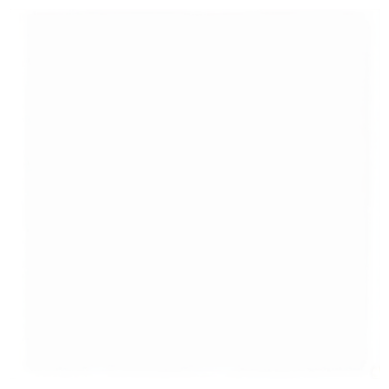

✅ Monogram vygenerovaný a uložený ako 'generated_monogram.png'


In [4]:
# 🚀 Inštalácia potrebných knižníc (trvá cca 2 min)
!pip install diffusers transformers accelerate safetensors --quiet
!pip install torch torchvision torchaudio numpy pillow tqdm matplotlib --quiet

import torch
from diffusers import StableDiffusionXLImg2ImgPipeline, EulerAncestralDiscreteScheduler
from PIL import Image
import matplotlib.pyplot as plt
import requests
from io import BytesIO

# ✅ Skontrolujeme GPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Použité zariadenie: {device}")

# ✅ Načítanie modelu Stable Diffusion XL
pipe = StableDiffusionXLImg2ImgPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16
).to(device)

# Nastavenie scheduleru pre lepšiu kvalitu
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)

# ✅ Prompt na generovanie industriálneho monogramu
prompt = "A highly detailed industrial monogram with intricate metal engravings, symmetrical, vintage typography, historical calligraphy, ultra-detailed, high resolution, realistic shading"

# ✅ Inicializačný obrázok (prázdne plátno)
init_image = Image.new("RGB", (512, 512), (255, 255, 255))

# ✅ Generovanie obrázka
image = pipe(prompt=prompt, image=init_image, strength=0.75, guidance_scale=7.5).images[0]

# ✅ Uloženie a zobrazenie výsledku
image.save("generated_monogram.png")
plt.imshow(image)
plt.axis("off")
plt.show()

print("✅ Monogram vygenerovaný a uložený ako 'generated_monogram.png'")

In [5]:
# 🚀 Inštalácia potrebných knižníc
!pip install diffusers transformers accelerate safetensors torch torchvision --quiet

import torch
from diffusers import StableDiffusionXLImg2ImgPipeline, EulerAncestralDiscreteScheduler
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# ✅ Kontrola GPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Použité zariadenie: {device}")

# ✅ Načítanie modelu Stable Diffusion XL
pipe = StableDiffusionXLImg2ImgPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16
).to(device)

# ✅ Nastavenie scheduleru pre lepšiu kvalitu
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)

# ✅ Vylepšený prompt
prompt = ("A highly detailed **historical industrial monogram**, featuring intricate metal engravings, "
          "symmetrical vintage typography, gothic calligraphy, ultra-detailed, 19th-century engraving, "
          "luxurious metallic finish, black and white ink, copperplate printing")

# ✅ Lepšia inicializácia obrazu (skica monogramu)
init_image = Image.new("RGB", (512, 512), (255, 255, 255))
draw = ImageDraw.Draw(init_image)
draw.text((100, 200), "M", fill=(0, 0, 0))  # Slabá iniciálna textúra pre monogram

# ✅ Generovanie monogramu
image = pipe(prompt=prompt, image=init_image, strength=0.85, guidance_scale=9.0).images[0]

# ✅ Uloženie a zobrazenie výsledku
image.save("generated_monogram.png")
plt.imshow(image)
plt.axis("off")
plt.show()

print("✅ Monogram vygenerovaný a uložený ako 'generated_monogram.png'")

Použité zariadenie: cuda


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

OutOfMemoryError: CUDA out of memory. Tried to allocate 20.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 14.12 MiB is free. Process 36915 has 14.72 GiB memory in use. Of the allocated memory 14.19 GiB is allocated by PyTorch, and 407.39 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)